In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


medical_insurance_cost = pd.read_csv("/workspaces/linear-regression-project-tutorial-omass/medical_insurance_cost.csv",)

df = medical_insurance_cost

df.head(20)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [25]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [26]:

df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Axes: xlabel='children', ylabel='charges'>

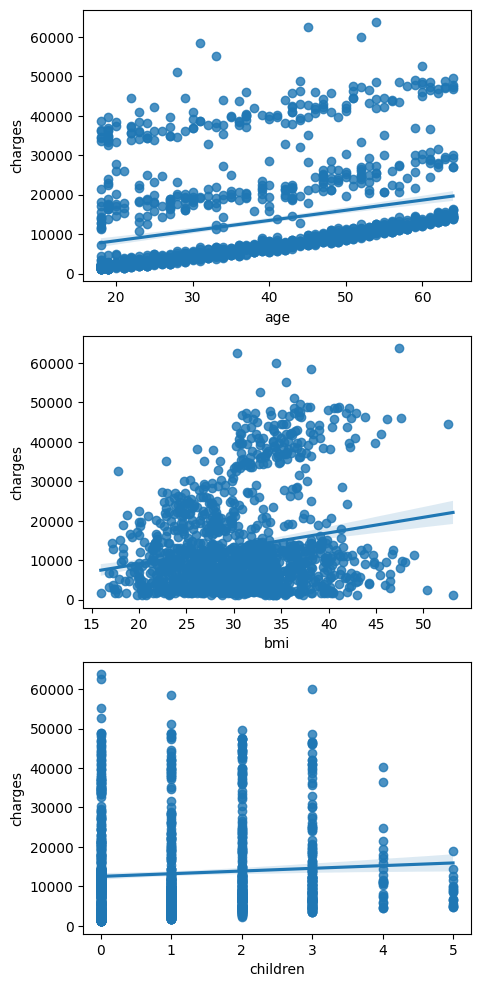

In [27]:
# Numerical variables
fig, axes = plt.subplots(3, 1, figsize=(5, 12))
sns.regplot(ax=axes[0], data=df, x="age", y="charges")
sns.regplot(ax=axes[1], data=df, x="bmi", y="charges")
sns.regplot(ax=axes[2], data=df, x="children", y="charges")



<Axes: xlabel='region', ylabel='charges'>

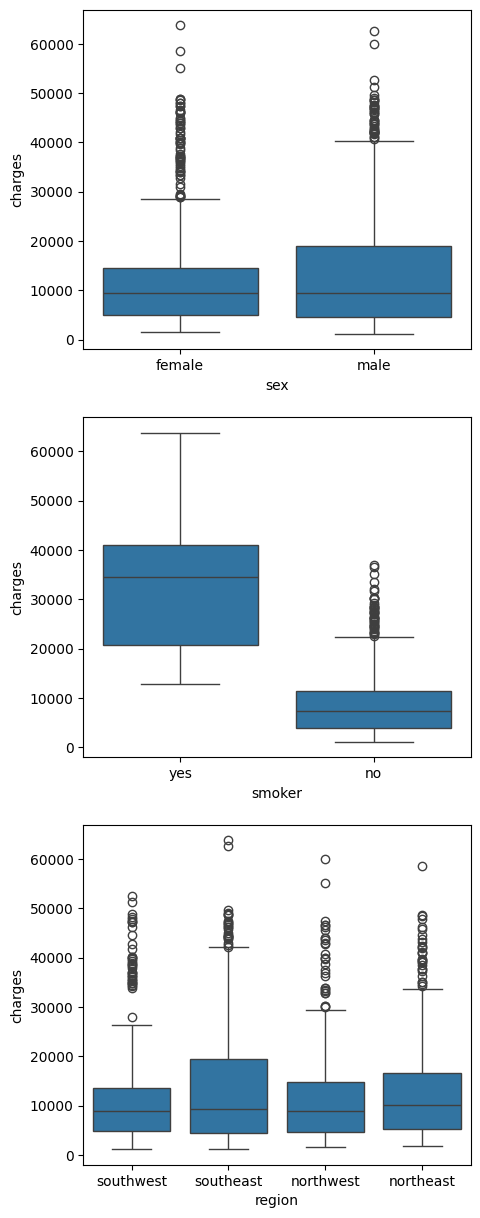

In [28]:
# Categorical variables
fig, axes = plt.subplots(3, 1, figsize=(5, 15))
sns.boxplot(ax=axes[0], x="sex", y="charges", data=df)
sns.boxplot(ax=axes[1], x="smoker", y="charges", data=df)
sns.boxplot(ax=axes[2], x="region", y="charges", data=df)

In [29]:
import pandas as pd
import scipy.stats as stats
from sklearn.feature_selection import SelectKBest, f_classif

#Tests for Pearson Correlation and ANOVA

# One-Hot Encoding for Categorical Variables
df_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'], drop_first=True)

# Pearson Correlation for Numerical Variables
for col in ['age', 'bmi', 'children']:
    corr, p_value = stats.pearsonr(df_encoded[col], df_encoded['charges'])
    print(f"{col} - Correlation: {corr}, P-Value: {p_value}")

# ANOVA for Categorical Variables
for col in df_encoded.columns:
    if col.startswith('sex_') or col.startswith('smoker_') or col.startswith('region_'):
        f_value, p_value = stats.f_oneway(df_encoded[df_encoded[col] == 1]['charges'], 
                                          df_encoded[df_encoded[col] == 0]['charges'])
        print(f"{col} - F-Value: {f_value}, P-Value: {p_value}")


age - Correlation: 0.2990081933306476, P-Value: 4.886693331718192e-29
bmi - Correlation: 0.1983409688336288, P-Value: 2.459085535116766e-13
children - Correlation: 0.0679982268479048, P-Value: 0.01285212852013651
sex_male - F-Value: 4.3997016974374565, P-Value: 0.03613272100596256
smoker_yes - F-Value: 2177.614868056519, P-Value: 8.271435842182967e-283
region_northwest - F-Value: 2.1308371016886865, P-Value: 0.1445969879937643
region_southeast - F-Value: 7.352531070220502, P-Value: 0.006782698910664397
region_southwest - F-Value: 2.499120549383146, P-Value: 0.11414659361891082


In [30]:
# One-hot encode the categorical variables with clear column naming
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')
encoded_categorical = one_hot_encoder.fit_transform(df[['sex', 'smoker', 'region']])
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=one_hot_encoder.get_feature_names_out(['sex', 'smoker', 'region']))

# Rename columns for clarity if needed
encoded_categorical_df.rename(columns=lambda x: x.split('_')[1] if 'region' in x else x, inplace=True)

# Combine with numerical features
df_combined = pd.concat([df[['age', 'bmi', 'children']], encoded_categorical_df, df['charges']], axis=1)


/home/codespace/.local/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [31]:
# Print the column names to check the actual names
print(df_combined.columns)


# Drop non-significant features
df_combined = df_combined.drop(['northwest', 'southwest', 'southeast', 'southwest'], axis=1)


Index(['age', 'bmi', 'children', 'sex_male', 'smoker_yes', 'northwest',
       'southeast', 'southwest', 'charges'],
      dtype='object')


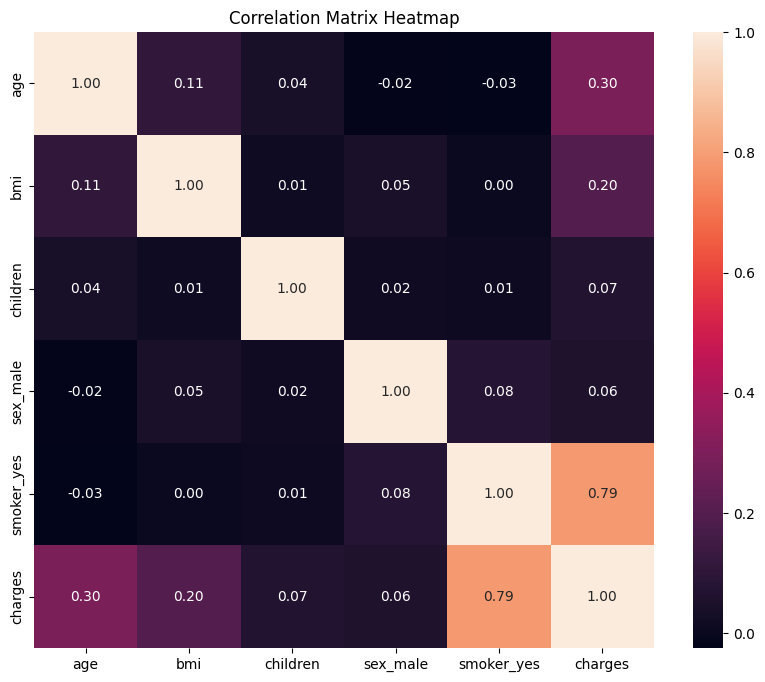

In [32]:
# Calculate the correlation matrix for the numerical and binary categorical variables with 'charges'
correlation_matrix = df_combined.corr()

# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cbar=True)
plt.title("Correlation Matrix Heatmap")
plt.show()


In [33]:
X = df_combined.drop('charges', axis=1)
y = df_combined['charges']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [34]:
#Standardize the featues
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [35]:
#Training the Linear Regression Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Display model parameters
print(f"Intercept: {model.intercept_}")
print(f"Coefficients: {model.coef_}")


Intercept: 13346.089736364485
Coefficients: [ 3.61628729e+03  1.97848617e+03  5.19291478e+02 -3.97472024e+00
  9.55960269e+03]


In [36]:
# Make predictions using the test set
y_pred = model.predict(X_test)

y_pred

/home/codespace/.local/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


array([226925.98997897, 202926.58690749, 307539.67955108, 232185.33114187,
       154764.45468798, 221692.23093497, 126601.16430359, 319779.01971288,
       148810.15967445, 248860.83477406, 181223.27331549, 223170.36870429,
       177281.11831125, 274597.69665795, 320838.60904678, 270948.05463474,
       276024.53950988, 265862.43482796, 235711.13352326, 231597.64648439,
       153631.57405143, 234379.70048026, 142197.55302006, 171658.05201943,
       251353.35966727, 273282.53131507, 299768.19157559, 172689.70048644,
       236977.90734651, 138066.85932743, 218044.39193526, 282439.78750788,
       158277.93549019, 162863.38189482, 167239.46105333, 254828.68494366,
       142039.44912339, 228522.47106787, 259212.79416919, 223250.06470933,
       141236.71002914, 155445.26822492, 287207.27421615, 277075.32290446,
       204449.05902138, 281630.72616605, 156863.19559823, 153388.36028229,
       251126.0930378 , 202439.6879278 , 312991.23684417, 137062.71645621,
       240465.76985952, 1

In [37]:
#Evaluating the model
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean squared error (MSE): {mse}")
print(f"Root Mean squared error (RMSE): {rmse}")
print(f"Mean absolute error (MAE): {mae}")
print(f"Coefficient of determination (R^2): {r2}")


Mean squared error (MSE): 33979257.05080821
Root Mean squared error (RMSE): 5829.17293025419
Mean absolute error (MAE): 4213.484797807138
Coefficient of determination (R^2): 0.7811302113434095
